# Uncertainty on market shares

In [579]:
import brightway2 as bw
import bw2calc as bc
import bw2data as bd
import numpy as np
import pandas as pd
import presamples as ps
import scipy
import scipy.stats as stats
ps.__version__

(0, 2, 6)

In [580]:
Simple_global_results_l4 = pd.read_csv("Simple_global_morris_results_l4.csv")
Simple_global_results_l8 = pd.read_csv("Simple_global_morris_results_l8.csv")
Simple_global_results_l12 = pd.read_csv("Simple_global_morris_results_l12.csv")
Simple_global_results_l16 = pd.read_csv("Simple_global_morris_results_l16.csv")
Simple_global_results_l20 = pd.read_csv("Simple_global_morris_results_l20.csv")

Simple_local_results = pd.read_csv("Simple_local_results.csv")

Simple_local_morris_results = pd.read_csv("Simple_local_morris_results.csv")
Simple_global_sobol_results = pd.read_csv("Simple_global_results_sobol.csv")


Simple_global_scores = pd.read_csv("Simple_global_scores_sobol.csv")
Simple_global_morris_scores = pd.read_csv("Simple_global_morris_scores.csv")
Simple_local_scores = pd.read_csv("Simple_local_morris_scores.csv")
Simple_local_scores_static = pd.read_csv("Simple_local_scores_static.csv")
Simple_global_std_scores = pd.read_csv("Simple_std_scores_sobol.csv")

In [581]:
#Simple_local_morris_results["type"] = "local"
#Simple_local_morris_results["method"] = "morris"

#Simple_global_sobol_results["type"] = "global"
#Simple_global_sobol_results["method"] = "sobol"

#Simple_global_results_l8["type"] = "global"
#Simple_global_results_l8["method"] = "morris"

In [582]:
Simple_global_results_l4["levels"] = '4'
Simple_global_results_l8["levels"] = '8'
Simple_global_results_l12["levels"] = '12'
Simple_global_results_l16["levels"] = '16'
Simple_global_results_l20["levels"] = '20'

In [583]:
Simple_global_morris_results = pd.concat([Simple_global_results_l4, 
                                   Simple_global_results_l8,
                                   Simple_global_results_l12,
                                   Simple_global_results_l16,
                                   Simple_global_results_l20])

In [584]:
Simple_global_morris_results

names         mu    mu_star     sigma  mu_star_conf  index levels
0     M0   1.343778   6.964999  7.587737      1.424785     10      4
1     M1   7.865151   7.865151  6.296716      3.672918     10      4
2     M0  -0.010178   7.304006  7.673487      0.429328    110      4
3     M1  11.090978  11.090978  7.390366      1.292869    110      4
4     M0  -0.209369   6.891105  7.265518      0.310864    210      4
..   ...        ...        ...       ...           ...    ...    ...
15    M1  11.633343  11.633343  7.259003      0.583108    710     20
16    M0   0.237396   6.458632  7.183502      0.220554    810     20
17    M1  11.229710  11.229710  7.245644      0.577936    810     20
18    M0  -0.268303   6.541124  7.220290      0.191212    910     20
19    M1  11.076156  11.076156  7.296529      0.514582    910     20

[100 rows x 7 columns]

# Simple local and global results

In [585]:
Simple_local_scores_static = Simple_local_scores_static.iloc[[0, 3, 1, 2, 4]]
Simple_local_scores_static['market scenarios']=['Baseline','M0','M0', 'M1', 'M1']
Simple_local_scores_static['process']=['Baseline','Pr1 = 0\nM0', 'Pr1 = 1\nM0', 'Pr2 = 0\nM1', 'Pr2 = 1\nM1']
Simple_global_scores_3136_N= Simple_global_scores[Simple_global_scores['category']== 3136]

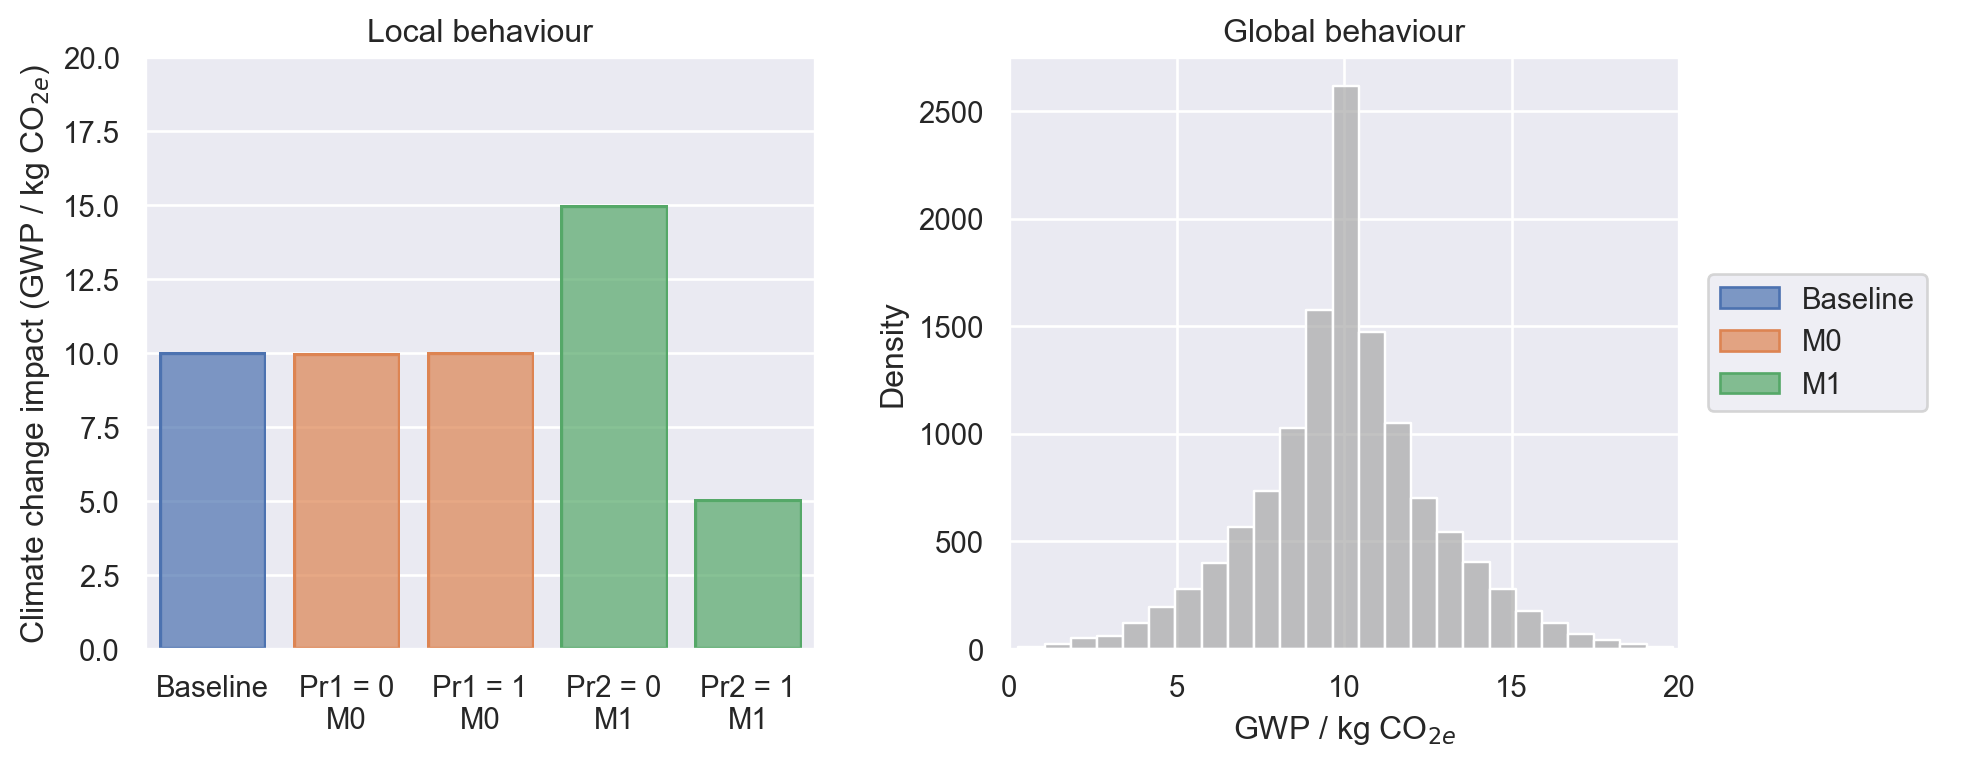

In [586]:
import matplotlib as mpl
import seaborn.objects as so
import matplotlib.pyplot as plt
f = mpl.figure.Figure(figsize=(9,4), dpi=100)
subfigures = f.subfigures(1, 2)

sf1, sf2 = subfigures

p1 =(
    so.Plot(Simple_local_scores_static, y="score", x="process", color='market scenarios')
    .limit(y=(0, 20))
    .label(color="",y="Climate change impact (GWP / kg CO$_{2e}$)", x="", title="Local behaviour"
    )
    .add(so.Bar())
    .save("figures/simple_static_scores.pdf", bbox_inches=mpl.transforms.Bbox.from_extents(0, 0, 6.25, 5))
)
p1.on(sf1).plot()

p2 = (
    so.Plot(Simple_global_std_scores, x="score")
    .add(so.Bars(color="darkgrey"), so.Hist(bins=25))
    .label(x="GWP / kg CO$_{2e}$", y="Density",
        title="Global behaviour", color="")
    .limit(x=(0, 20))

)
p2.on(sf2).plot()

#f.savefig("figures/simple_sys_scores.pdf", bbox_inches=mpl.transforms.Bbox.from_extents(-0.2, -0.5, 8.69, 4))


# Runtime

In [587]:
runtime_morris = pd.DataFrame({
    'runtime in seconds':Simple_global_morris_scores["runtime"].unique(),
    'number of trajectory':Simple_global_morris_scores["category"].unique(),
    'number of runs':Simple_global_morris_scores["runs"].unique(),
})

In [588]:
runtime_sobol = pd.DataFrame({
    'runtime in seconds':Simple_global_scores["runtime"].unique(),
    'number of trajectory':Simple_global_scores["category"].unique(),
    'number of runs':Simple_global_scores["runs"].unique(),
})

In [589]:
runtime_sobol

runtime in seconds  number of trajectory  number of runs
0            0.645946                    64             258
1            2.045922                   256            1026
2            4.335915                   576            2306
3            7.585877                  1024            4098
4           11.724015                  1600            6402
5           16.907731                  2304            9218
6           22.817942                  3136           12546

In [590]:
trajectories = list(range(10, 1010, 100))
SA_conf_morris = []
for trajectory in trajectories:
    df = pd.DataFrame({
        'number of trajectory': trajectory,
        'names': Simple_global_morris_results[Simple_global_morris_results['index']== trajectory]['names'],
        'mu_star_conf': Simple_global_morris_results[Simple_global_morris_results['index']== trajectory]['mu_star_conf'],
        'levels': Simple_global_morris_results[Simple_global_morris_results['index']== trajectory]['levels']
    })
    SA_conf_morris.append(df)

SA_conf_morris = pd.concat(SA_conf_morris, ignore_index=True)

In [591]:
trajectories = [64, 256, 576, 1024, 1600, 2304, 3136]
SA_conf = []
for trajectory in trajectories:
    df = pd.DataFrame({
        'number of trajectory': trajectory,
        'names': Simple_global_sobol_results[Simple_global_sobol_results['index']== trajectory]['names'],
        'ST_conf': Simple_global_sobol_results[Simple_global_sobol_results['index']== trajectory]['ST_conf'],
#        'levels': Simple_global_sobol_results[Simple_global_sobol_results['index']== trajectory]['index']
    })
    SA_conf.append(df)

SA_conf = pd.concat(SA_conf, ignore_index=True)

In [592]:
SA_conf_morris= SA_conf_morris[SA_conf_morris['names']== "M1"]
SA_conf= SA_conf[SA_conf['names']== "M1"]

C:\Users\rla44\Anaconda3\envs\ab\lib\site-packages\seaborn\_core\plot.py:1644: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_subset = grouped_df.get_group(pd_key)
C:\Users\rla44\Anaconda3\envs\ab\lib\site-packages\seaborn\_core\plot.py:1644: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_subset = grouped_df.get_group(pd_key)


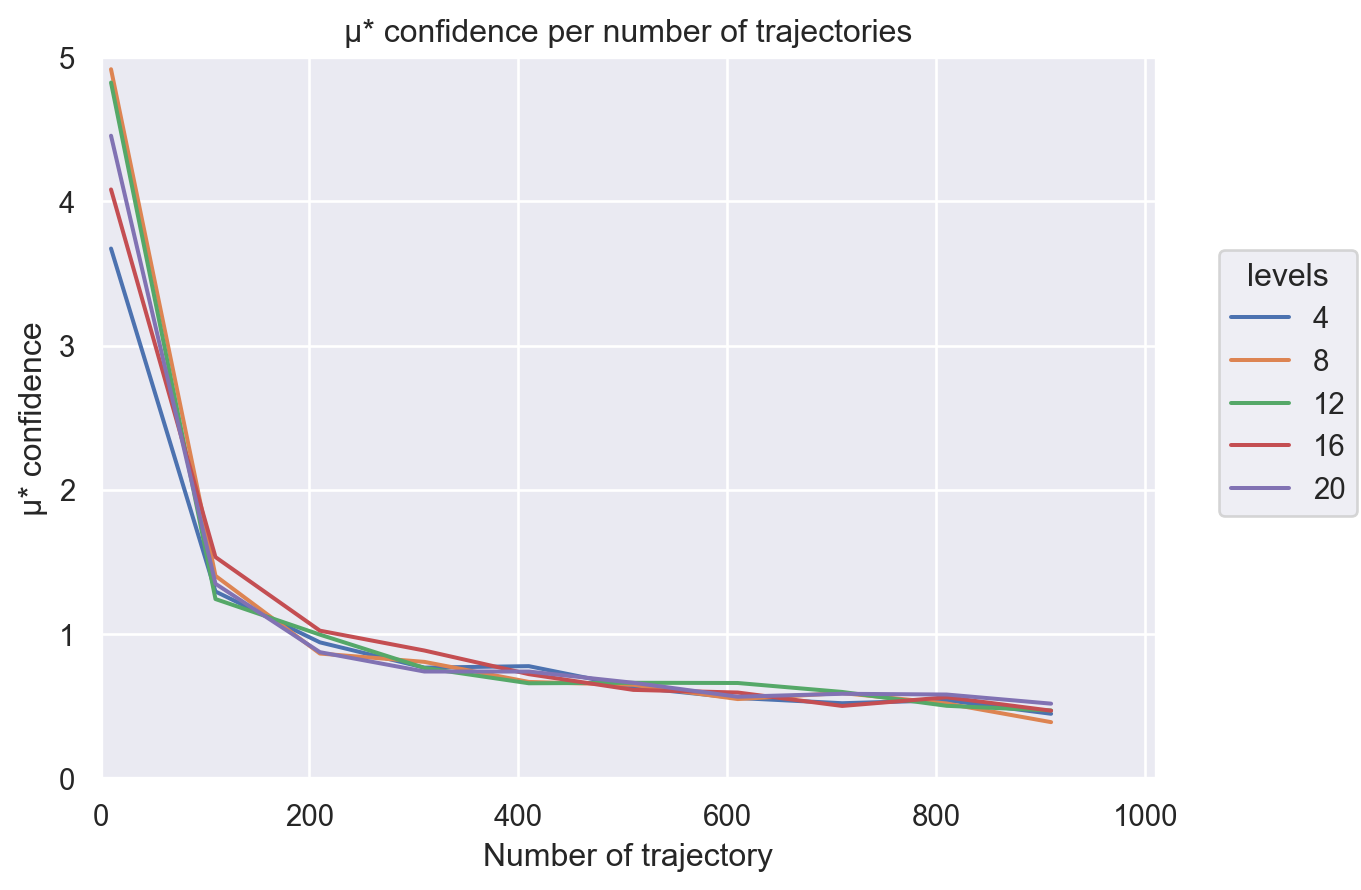

In [593]:
import matplotlib as mpl
import seaborn.objects as so
import matplotlib.pyplot as plt


(
    so.Plot(SA_conf_morris, x="number of trajectory", y="mu_star_conf", color= "levels")
    .add(so.Line())
    .limit(x=(0, 1010),y=(0, 5))
    .label(x="Number of trajectory", y="μ* confidence",
        title="μ* confidence per number of trajectories", color="levels")
 #   .layout(size=(3, 2))
)

#f.savefig("figures/confidence.pdf", bbox_inches=mpl.transforms.Bbox.from_extents(-0.2, -0.5, 9, 3))



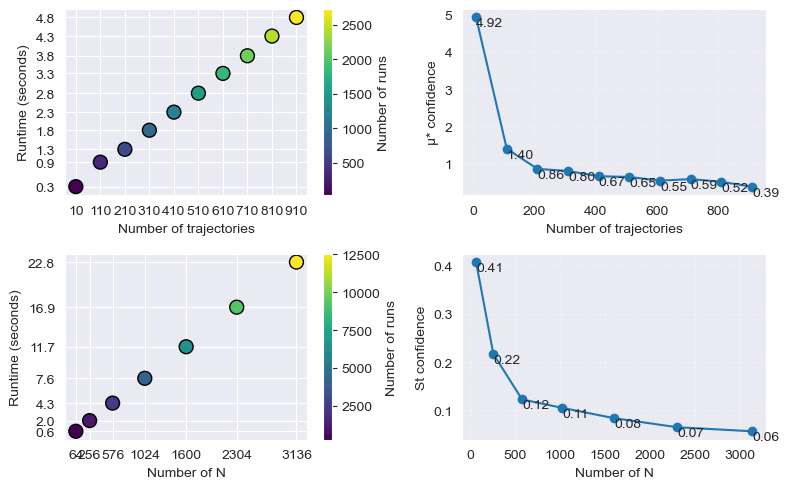

In [594]:
import matplotlib.ticker as ticker
num_trajectories_morris = runtime_morris['number of trajectory']
num_runs_morris = runtime_morris['number of runs']
time_morris = runtime_morris['runtime in seconds']
SA_morris_means = SA_conf_morris[SA_conf_morris['levels']=='8']["mu_star_conf"]

num_trajectories_sobol = runtime_sobol['number of trajectory']
num_runs_sobol = runtime_sobol['number of runs']
time_sobol = runtime_sobol['runtime in seconds']
SA_sobol_means = SA_conf["ST_conf"]

#import seaborn as sns
#sns.set_style("darkgrid")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 5), 
                                             )

scatter_morris = ax1.scatter(num_trajectories_morris, time_morris, c=num_runs_morris, cmap='viridis', s=100, edgecolors='k')
ax1.set_xlabel('Number of trajectories')
ax1.set_ylabel('Runtime (seconds)')
#ax1.set_xlim([min(num_trajectories_morris), max(num_trajectories_morris)])
ax1.set_xticks(num_trajectories_morris)
ax1.set_yticks(time_morris)
#ax1.set_ylim([min(time_morris), max(time_morris)])
ax1.tick_params(axis='y')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.1f}'))

cbar_morris = plt.colorbar(scatter_morris, ax=ax1)
cbar_morris.set_label('Number of runs')

#ax1.grid(True, linestyle='--', alpha=0.6)
#ax1.legend(['Number of runs'], loc='upper left')

ax2.errorbar(num_trajectories_morris, SA_morris_means, fmt='o-', capsize=5)
ax2.set_xlabel('Number of trajectories')
ax2.set_ylabel('μ* confidence')
ax2.tick_params(axis='y')
ax2.grid(True, linestyle='--', alpha=0.3)
for x, y in zip(num_trajectories_morris, SA_morris_means):
    ax2.text(x, y, f"{y:.2f}", ha='left', va='top')


scatter_sobol = ax3.scatter(num_trajectories_sobol, time_sobol, c=num_runs_sobol, cmap='viridis', s=100, edgecolors='k')
ax3.set_xlabel('Number of N')
ax3.set_ylabel('Runtime (seconds)')
#ax3.set_xlim([min(num_trajectories_sobol), max(num_trajectories_sobol)])
ax3.set_xticks(num_trajectories_sobol)
ax3.set_yticks(time_sobol)
#ax3.set_ylim([min(time_sobol), max(time_sobol)])
ax3.tick_params(axis='y')
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.1f}'))

cbar_sobol = plt.colorbar(scatter_sobol, ax=ax3)
cbar_sobol.set_label('Number of runs')

#ax3.grid(True, linestyle='--', alpha=0.6)
#ax3.legend(['Number of runs'], loc='upper left')

ax4.errorbar(num_trajectories_sobol, SA_sobol_means, fmt='o-',  capsize=5)
ax4.set_xlabel('Number of N')
ax4.set_ylabel('St confidence')
ax4.tick_params(axis='y')
ax4.grid(True, linestyle='--', alpha=0.3)
for x, y in zip(num_trajectories_sobol, SA_sobol_means):
    ax4.text(x, y, f"{y:.2f}", ha='left', va='top')

plt.tight_layout()
plt.show()
fig.savefig("figures/confidence.pdf", bbox_inches=mpl.transforms.Bbox.from_extents(-0.2, 0, 9, 5))


In [595]:
num_trajectories_sobol

0      64
1     256
2     576
3    1024
4    1600
5    2304
6    3136
Name: number of trajectory, dtype: int64

# Sensitivity indices

In [596]:
Simple_local_std = Simple_local_scores.groupby(['method', 'category'])['score'].agg(
    std =lambda x: x.std(),

).reset_index()

In [597]:
Simple_global_sobol_results= Simple_global_sobol_results[Simple_global_sobol_results['index'] == 2304]
Simple_global_morris_results = Simple_global_results_l8[Simple_global_results_l8['index'] == 510]

In [598]:
Simple_local_morris_results.set_index('names', inplace=True)
Simple_global_morris_results.set_index('names', inplace=True)
Simple_global_sobol_results.set_index('names', inplace=True)
Simple_local_std.set_index('category', inplace=True)

In [599]:
Simple_global_morris_results = Simple_global_morris_results.drop(['mu','mu_star_conf','sigma','levels', 'index'], axis=1)
Simple_local_morris_results = Simple_local_morris_results.drop(['mu','mu_star_conf','sigma','index'], axis=1)
Simple_global_sobol_results = Simple_global_sobol_results.drop(['S1','S1_conf' ,'ST_conf','index'], axis=1)
Simple_local_std  = Simple_local_std.drop(['method'], axis=1)
Simple_global_std  = Simple_global_std_scores.drop(['method', 'iteration', 'category', 'runtime', 'runs' ], axis=1)

In [600]:
Simple_global_std = Simple_global_scores.groupby(['scenario'])['score'].agg(
    std =lambda x: x.std(),

)

In [601]:
Simple_global_std

std
scenario          
fu        4.904482

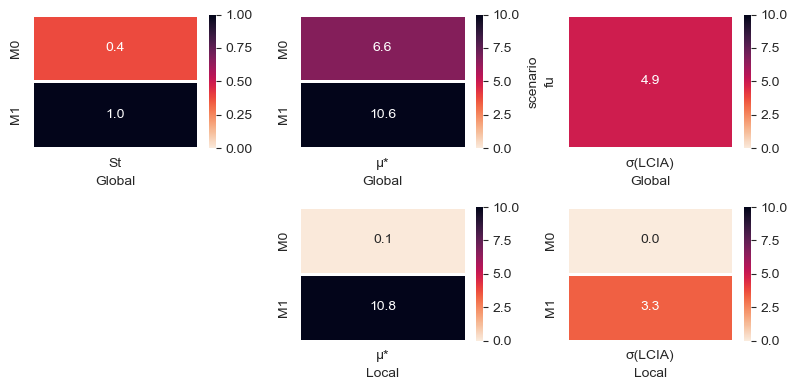

In [602]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 3, figsize=(8, 4))

sns.heatmap(Simple_global_sobol_results, cmap="rocket_r", annot=True, fmt=".1f", vmin=0, vmax=1, 
            linewidth=1, linecolor="white", xticklabels=['St'], ax=axes[0,0])
axes[0,0].set(xlabel="Global", ylabel="")

sns.heatmap(Simple_local_morris_results, cmap="rocket_r", annot=True, fmt=".1f", vmin=0, vmax=10, 
            linewidth=1, linecolor="white", xticklabels=['μ*'], ax=axes[1,1])
axes[1,1].set(xlabel="Local", ylabel="")

sns.heatmap(Simple_global_morris_results, cmap="rocket_r", annot=True, fmt=".1f", vmin=0, vmax=10, 
            linewidth=1, linecolor="white", xticklabels=['μ*'], ax=axes[0,1])
axes[0,1].set(xlabel="Global", ylabel="")

sns.heatmap(Simple_local_std , cmap="rocket_r", annot=True, fmt=".1f", vmin=0, vmax=10, 
            linewidth=1, linecolor="white", xticklabels=['σ(LCIA)'], ax=axes[1,2])
axes[1,2].set(xlabel="Local", ylabel="")

sns.heatmap(Simple_global_std , cmap="rocket_r", annot=True, fmt=".1f", vmin=0, vmax=10, 
            linewidth=1, linecolor="white", xticklabels=['σ(LCIA)'],ax=axes[0,2])
axes[0,2].set(xlabel="Global")

axes[1,0].set_axis_off()
plt.tight_layout()
plt.show()
fig.savefig("figures/simple_sensitivity_indices.pdf", bbox_inches=mpl.transforms.Bbox.from_extents(-0.2, 0, 9, 4))

In [603]:
#Simple_global_morris_results_M1 = Simple_global_results[Simple_global_results['names'] == 'M1 mix']
#Simple_global_morris_results_M0 = Simple_global_results[Simple_global_results['names'] == 'M0 mix']

In [604]:
#Simple_global_sobol_results_M1 = Simple_global_sobol_results[Simple_global_sobol_results['names'] == 'M1']
#Simple_global_sobol_results_M0 = Simple_global_sobol_results[Simple_global_sobol_results['names'] == 'M0']

In [605]:
#SA_results = pd.concat()

# Ecoinvent examples

In [1531]:
Local_scores = pd.read_csv("Local_scores.csv")
Global_category_scores = pd.read_csv("Global__market_test_category_scores.csv")
Global_category_scores_to_add = pd.read_csv("Global__market_test_category_scores_to_add.csv")
Global_category_scores_to_add2 = pd.read_csv("Global__market_test_category_scores_to_add2.csv")
Global_category_scores_to_add3 = pd.read_csv("Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores.csv")

In [1539]:
#Global_category_scores = pd.concat([Global_category_scores, Global_category_scores_to_add2], ignore_index=True)
#Global_category_scores =  pd.concat([Global_category_scores_to_add2, Global_category_scores_to_add3], ignore_index=True)
Global_category_scores = Global_category_scores_to_add3

In [1540]:
Global_category_scores['combined'] =  Global_category_scores['reference_product'].astype(str) + Global_category_scores['tier'].astype(str) 
Global_category_scores['fus'] =  Global_category_scores['fu'].astype(str) + Global_category_scores['tier'].astype(str) 

In [1541]:
#Global_category_scores['fus'] = Global_category_scores['fus'] + '_' + Global_category_scores.groupby('fus').cumcount().astype(str)

In [1552]:
Local_scores_1 = Local_scores.drop(columns=[  'score', 'mu_star_local'])
Global_category_scores_1 = Global_category_scores.drop(columns=['sigma', 'mu', 'mu_star_conf', 'count', 'score', 'mu_star_relative'])

In [1553]:
duplicates = Global_category_scores_1.duplicated(subset=['fus', 'combined'], keep=False)
#Global_category_scores_1[duplicates]

In [1588]:
merged_df = Global_category_scores_1.pivot_table(
    index='names', 
    columns=[ 'combined', 'fus'], 
    values='mu_star', 
    aggfunc='first'
).fillna(0)

merged_df.columns = [f'{col}' for col in merged_df.columns]
merged_df = Global_category_scores_1.set_index(['names', 'combined', 'fus'])['mu_star'].unstack(['combined', 'fus']).fillna(0)

In [1589]:
cols_to_drop = [
    ('_market_for_transport__freight_train___ton_kilometer__CH__None_2', 
     '_transport__freight_train__electricity___ton_kilometer__CH__None_2'),
    ('_market_for_transport__freight_train___ton_kilometer__CH__None_2', 
     '_transport__freight_train__diesel__with_particle_filter___ton_kilometer__CH__None_2')
]

existing_cols = [col for col in cols_to_drop if col in merged_df.columns]
merged_df = merged_df.drop(columns=existing_cols)

In [1590]:
merged_df= merged_df.drop(index=[
         "Crop and animal production, hunting and related service activities",
#         "Forestry and logging",
         "Mining of coal and lignite",
         "Extraction of crude petroleum and natural gas",
         "Mining of metal ores",
         "Other mining and quarrying",
         "Manufacture of food products",
         "Manufacture of wood and products of wood and cork",
         "Manufacture of paper and paper products",
#          "Manufacture of coke and refined petroleum products",
         "Manufacture of chemicals and chemical products",
         "Manufacture of rubber and plastic products",
         "Manufacture of other non-metallic mineral products",
         "Manufacture of basic metals",
        "Manufacture of electrical equipment",
         "Manufacture of machinery and equipment",
         "Manufacture of other transport equipment",
#          "Electricity, gas, steam and air conditioning supply",
         "Sewerage",
    "Unknown",
#          "Waste collection, treatment, and disposal activities",
         "Construction of buildings",
         "Civil engineering",
         "Specialized construction activities",
         "Wholesale and retail trade and repair of motor vehicles and motorcycles",
#          "Wholesale trade, except of motor vehicles and motorcycles",
 #         "Land transport and transport via pipelines",
         "Water transport",
])

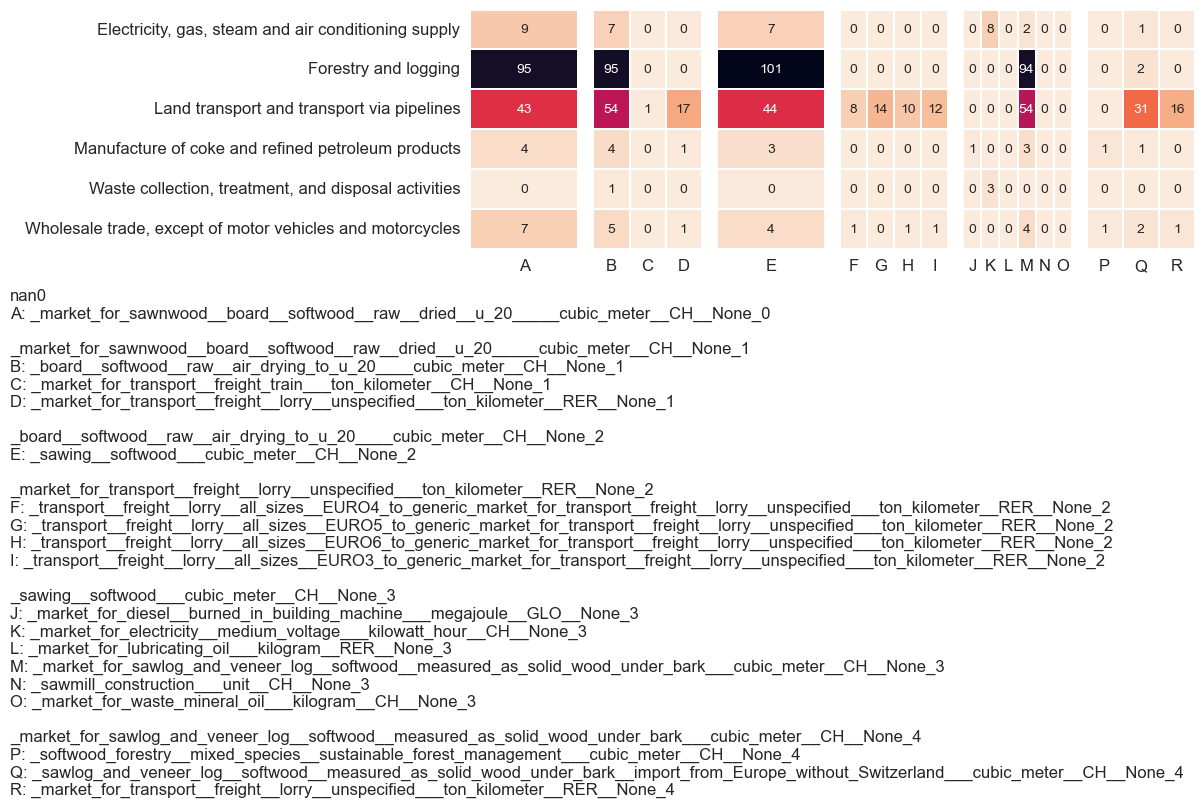

In [1692]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique reference_product values
reference_values = merged_df.columns.get_level_values('combined').unique()
n_plots = len(reference_values)

# Set up figure and axes for side-by-side plotting
fig, axes = plt.subplots(1, n_plots, figsize=(2* n_plots, 3), sharey=True)

if n_plots == 1:
    axes = [axes]  # Ensure axes is iterable when only one plot

# Initialize legend text storage
legend_texts = []
global_index = 0
# Loop over each reference_value and plot the heatmap
for i, reference_value in enumerate(reference_values):
    filtered_df = merged_df.xs(reference_value, level='combined', axis=1)

    # Plot the heatmap
    sns.heatmap(filtered_df, cmap="rocket_r", annot=True, fmt=".0f", 
                vmin=0, vmax=100, linewidth=0.3, linecolor="white", ax=axes[i], cbar=False)

    # Generate labels (A, B, C, ...) for columns
    labels = [chr(65 + (global_index + j) % 26) for j in range(len(filtered_df.columns))]
    global_index += len(filtered_df.columns)

    # Center the ticks
    axes[i].set_xticks(np.arange(len(filtered_df.columns)) + 0.5)
    axes[i].set_xticklabels(labels, ha="center", fontsize=12, rotation=0)
    axes[i].set_yticks(np.arange(len(filtered_df.index)) + 0.5)
    axes[i].set_yticklabels(filtered_df.index, va="center", fontsize=12)

    # Axis labels and title
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
   # axes[i].set_title(f"{reference_value}")

    # Create the legend text
    legend_labels = {labels[j]: filtered_df.columns[j] for j in range(len(filtered_df.columns))}
    legend_text = f"{reference_value}\n" + '\n'.join([f'{key}: {value}' for key, value in legend_labels.items()])
    legend_texts.append(legend_text)

# Plot all legends below each other
legend_full_text = '\n\n'.join(legend_texts)
fig.text(+0, 0, legend_full_text, fontsize=12, ha='left', va='top')
fig.subplots_adjust(bottom=0.8)

# Adjust layout for better display
plt.tight_layout()# Reserve space below for legends
plt.show()
fig.savefig("figures/recursive_calc_categories.pdf", bbox_inches=mpl.transforms.Bbox.from_extents(-0.5, -5.5, fig.bbox.x1 / fig.dpi, fig.bbox.y1 / fig.dpi + 0.5))


In [2175]:
Global_category_scores = pd.read_csv("Global__market_for_inorganic_phosphorus_fertiliser__as_P2O5___kilogram__IS__None__category_scores.csv")

In [2176]:
Global_category_scores['combined'] =  Global_category_scores['reference_product'].astype(str) + Global_category_scores['tier'].astype(str) 
Global_category_scores['fus'] =  Global_category_scores['fu'].astype(str) + Global_category_scores['tier'].astype(str) 

In [2177]:
Global_category_scores_1 = Global_category_scores.drop(columns=['sigma', 'mu', 'mu_star_conf', 'count', 'score', 'mu_star'])

In [2178]:
merged_df = Global_category_scores_1.pivot_table(
    index='names', 
    columns=[ 'combined', 'fus'], 
    values='mu_star_relative', 
    aggfunc='first'
).fillna(0)

merged_df.columns = [f'{col}' for col in merged_df.columns]
merged_df = Global_category_scores_1.set_index(['names', 'combined', 'fus'])['mu_star_relative'].unstack(['combined', 'fus']).fillna(0)

In [2179]:
# cols_to_drop = [
#                 merged_df.columns[9], 
#                 merged_df.columns[10], 
#                 merged_df.columns[11], 
#                 merged_df.columns[12], 
#                 merged_df.columns[13], 
#                 merged_df.columns[14], 

    
# ]

# existing_cols = [col for col in cols_to_drop if col in merged_df.columns]
# merged_df = merged_df.drop(columns=existing_cols)
# merged_df.columns[0]

In [2180]:
merged_df= merged_df.drop(index=[
#         "Crop and animal production, hunting and related service activities",
         "Forestry and logging",
         "Mining of coal and lignite",
         "Extraction of crude petroleum and natural gas",
         "Mining of metal ores",
         "Other mining and quarrying",
         "Manufacture of food products",
         "Manufacture of wood and products of wood and cork",
#         "Manufacture of paper and paper products",
          "Manufacture of coke and refined petroleum products",
 #        "Manufacture of chemicals and chemical products",
         "Manufacture of rubber and plastic products",
         "Manufacture of other non-metallic mineral products",
         "Manufacture of basic metals",
        "Manufacture of electrical equipment",
         "Manufacture of machinery and equipment",
         "Manufacture of other transport equipment",
#          "Electricity, gas, steam and air conditioning supply",
#         "Sewerage",
    "Unknown",
#    'Manufacture of computer, electronic, and optical products',
#       'Manufacture of fabricated metal products',
          "Waste collection, treatment, and disposal activities",
         "Construction of buildings",
         "Civil engineering",
         "Specialized construction activities",
         "Wholesale and retail trade and repair of motor vehicles and motorcycles",
          "Wholesale trade, except of motor vehicles and motorcycles",
#         "Land transport and transport via pipelines",
         "Water transport",
])

In [2181]:
merged_df.columns[0]

('nan0',
 '_market_for_inorganic_phosphorus_fertiliser__as_P2O5___kilogram__IS__None_0')

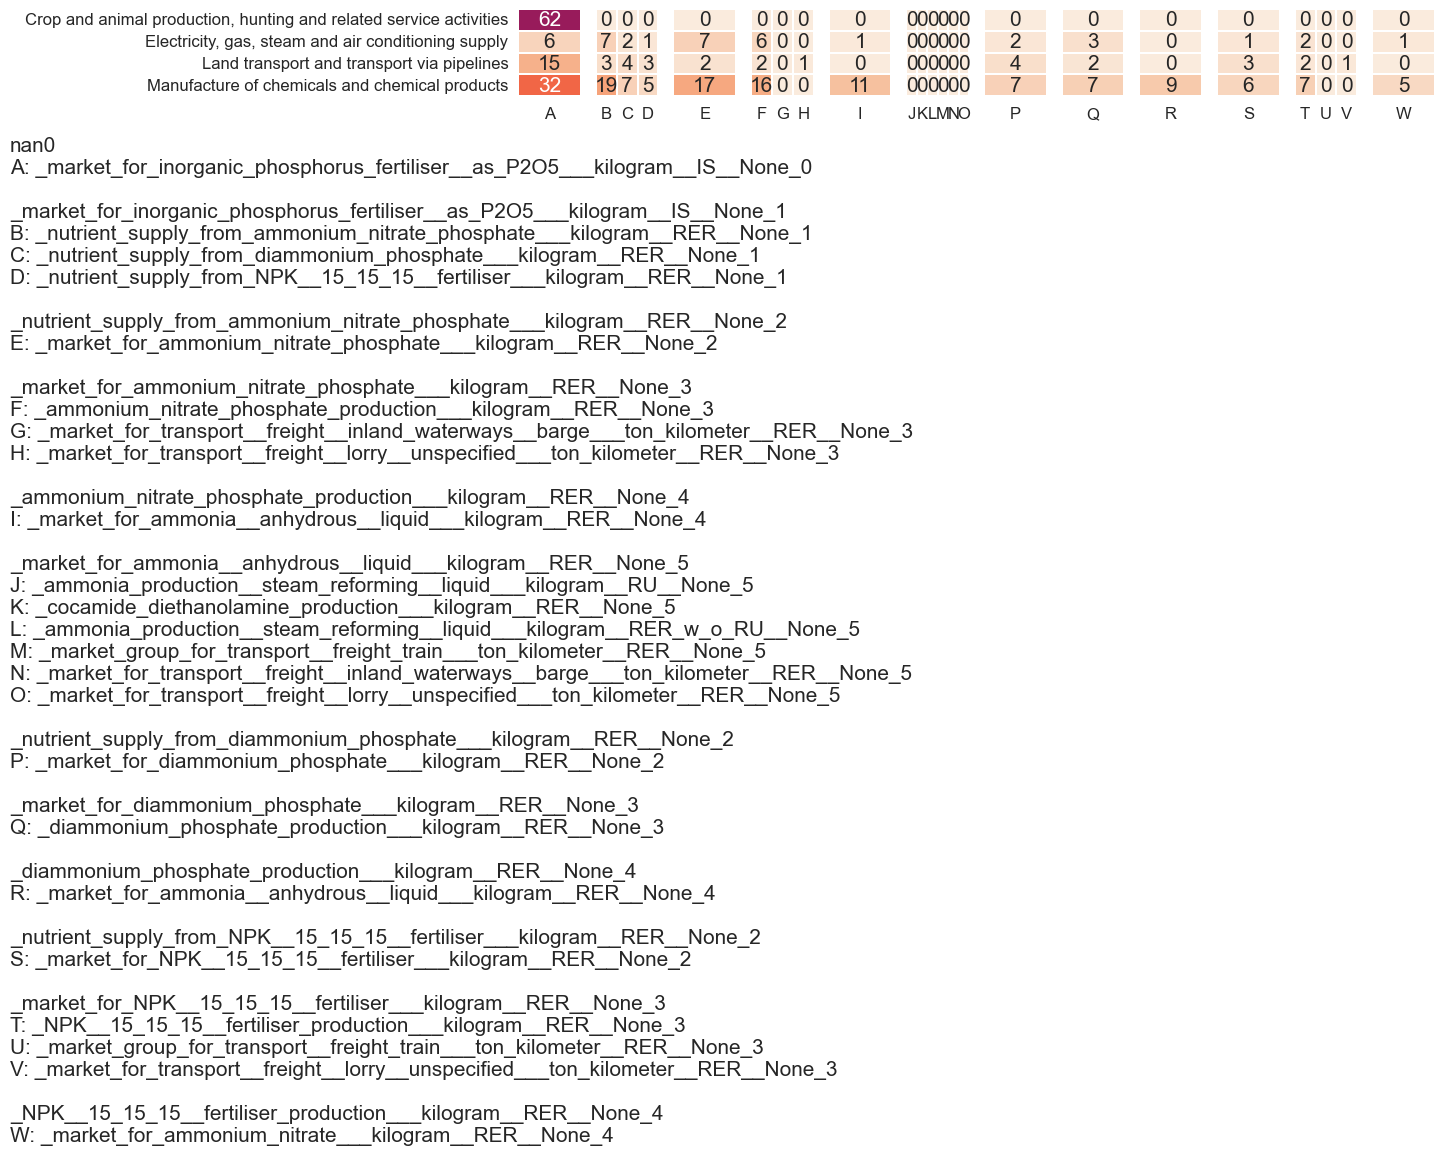

In [2182]:
# Get unique reference_product values
reference_values = merged_df.columns.get_level_values('combined').unique()
n_plots = len(reference_values)

# Set up figure and axes for side-by-side plotting
fig, axes = plt.subplots(1, n_plots, figsize=(1.2* n_plots, 1.5), sharey=True)

if n_plots == 1:
    axes = [axes]  # Ensure axes is iterable when only one plot

# Initialize legend text storage
legend_texts = []
global_index = 0
# Loop over each reference_value and plot the heatmap
for i, reference_value in enumerate(reference_values):
    filtered_df = merged_df.xs(reference_value, level='combined', axis=1)

    # Plot the heatmap
    sns.heatmap(filtered_df, cmap="rocket_r", annot=True, fmt=".0f",  annot_kws={"size": 15},
                vmin=0, vmax=100, linewidth=0.3, linecolor="white", ax=axes[i], cbar=False)

    # Generate labels (A, B, C, ...) for columns
    labels = [chr(65 + (global_index + j) % 26) for j in range(len(filtered_df.columns))]
    global_index += len(filtered_df.columns)

    # Center the ticks
    axes[i].set_xticks(np.arange(len(filtered_df.columns)) + 0.5)
    axes[i].set_xticklabels(labels, ha="center", fontsize=12, rotation=0)
    axes[i].set_yticks(np.arange(len(filtered_df.index)) + 0.5)
    axes[i].set_yticklabels(filtered_df.index, va="center", fontsize=12)

    # Axis labels and title
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
   # axes[i].set_title(f"{reference_value}")

    # Create the legend text
    legend_labels = {labels[j]: filtered_df.columns[j] for j in range(len(filtered_df.columns))}
    legend_text = f"{reference_value}\n" + '\n'.join([f'{key}: {value}' for key, value in legend_labels.items()])
    legend_texts.append(legend_text)

# Plot all legends below each other
legend_full_text = '\n\n'.join(legend_texts)
fig.text(+0, 0, legend_full_text, fontsize=15, ha='left', va='top')
fig.subplots_adjust(bottom=0.8)

# Adjust layout for better display
plt.tight_layout()# Reserve space below for legends
plt.show()
fig.savefig("figures/recursive_calc_fertiliser.pdf", bbox_inches=mpl.transforms.Bbox.from_extents(-0.5, -5.5, fig.bbox.x1 / fig.dpi, fig.bbox.y1 / fig.dpi + 0.5))

In [2295]:
Global_market_10 = pd.read_csv("Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__market_scores.csv")
Global_market_20 = pd.read_csv("Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__market_scores_20.csv")
Global_market_100 = pd.read_csv("Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__market_scores_100.csv")
Global_market_150 = pd.read_csv("Global_market_for_sawnwood_board_softwood_raw_dried_u_20_cubic_meter_CH_None_market_scores_150.csv")
Global_market_200 = pd.read_csv("Global_market_for_sawnwood_board_softwood_raw_dried_u_20_cubic_meter_CH_None_market_scores_200.csv")
Global_market_250 = pd.read_csv("Global_market_for_sawnwood_board_softwood_raw_dried_u_20_cubic_meter_CH_None_market_scores_250.csv")
Global_market_300 = pd.read_csv("Global_market_for_sawnwood_board_softwood_raw_dried_u_20_cubic_meter_CH_None_market_scores_300.csv")

In [2032]:
global_markets = [Global_market_10, Global_market_100, Global_market_150, 
                  Global_market_200, Global_market_250, Global_market_300]

nb_factors = len(Global_market_250)

for market in global_markets:
    market['number of variables'] = nb_factors

In [2033]:
Global_category_10 = pd.read_csv("Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_10.csv")
Global_category_20 = pd.read_csv("Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores.csv")
Global_category_30 = pd.read_csv("Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_30.csv")
Global_category_40 = pd.read_csv("Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_40.csv")
Global_category_100 = pd.read_csv("Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_100.csv")
Global_category_300 = pd.read_csv("Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_300.csv")
Global_category_150 = pd.read_csv("Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_150.csv")
Global_category_250 = pd.read_csv("Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__category_scores_250.csv")

In [1970]:
Global_market_20 = Global_market_20[Global_market_20["names"] == "'market for sawlog and veneer log, softwood, measured as solid wood under bark' (cubic meter, CH, None)"]
Global_market_10 = Global_market_10[Global_market_10["names"] == "'market for sawlog and veneer log, softwood, measured as solid wood under bark' (cubic meter, CH, None)"]
Global_market_100 = Global_market_100[Global_market_100["names"] == "'market for sawlog and veneer log, softwood, measured as solid wood under bark' (cubic meter, CH, None)"]
Global_market_150 = Global_market_150[Global_market_150["names"] == "'market for sawlog and veneer log, softwood, measured as solid wood under bark' (cubic meter, CH, None)"]
Global_market_200 = Global_market_200[Global_market_200["names"] == "'market for sawlog and veneer log, softwood, measured as solid wood under bark' (cubic meter, CH, None)"]
Global_market_250 = Global_market_250[Global_market_250["names"] == "'market for sawlog and veneer log, softwood, measured as solid wood under bark' (cubic meter, CH, None)"]
Global_market_300 = Global_market_300[Global_market_300["names"] == "'market for sawlog and veneer log, softwood, measured as solid wood under bark' (cubic meter, CH, None)"]

In [1972]:
joined_df = pd.concat([Global_market_10, 
                       Global_market_100,
                      Global_market_150,
                      Global_market_200,
                        Global_market_250,
                      Global_market_300], axis=0)
joined_df2 = pd.concat([Global_category_10, 
                       Global_category_100,
                       Global_category_300,
                       Global_category_150,
                       Global_category_250], axis=0)

In [1973]:
len(Global_category_100)

24

In [1802]:
joined_df2 = joined_df2[joined_df2["names"] == 'Forestry and logging']
joined_df2['number of variables'] = len(Global_category_10)
joined_df2['type'] = 'ISSC_category' 
joined_df['type'] = 'market' 

In [1803]:
joined_df2

names  mu    mu_star  sigma  mu_star_conf  trajectories  \
15  Forestry and logging NaN  82.762276    NaN     14.586364            10   
15  Forestry and logging NaN  96.220118    NaN      6.042619           100   
15  Forestry and logging NaN  98.962985    NaN      3.999458           300   
15  Forestry and logging NaN  98.148556    NaN      4.916440           150   
15  Forestry and logging NaN  92.024928    NaN      3.971998           250   

    number of variables      runtime  number of runs      score  \
15                   24    96.143894             250  54.698956   
15                   24   693.353416            2500  54.698956   
15                   24  1873.084810            7500  54.698956   
15                   24  1139.190297            3750  54.698956   
15                   24  1491.904000            6250  54.698956   

    mu_star_relative  mu_star_conf_relative  count  \
15        151.305038              26.666622      2   
15        175.908509              11.047047      2   
15        180.922987               7.311763      2   
15        179.434058               8.988179      2   
15        168.238911               7.261561      2   

                                                   fu           type  
15  _market_for_sawnwood__board__softwood__raw__dr...  ISSC_category  
15  _market_for_sawnwood__board__softwood__raw__dr...  ISSC_category  
15  _market_for_sawnwood__board__softwood__raw__dr...  ISSC_category  
15  _market_for_sawnwood__board__softwood__raw__dr...  ISSC_category  
15  _market_for_sawnwood__board__softwood__raw__dr...  ISSC_category

In [680]:
market_issc = pd.concat([joined_df2 , joined_df], ignore_index=True)

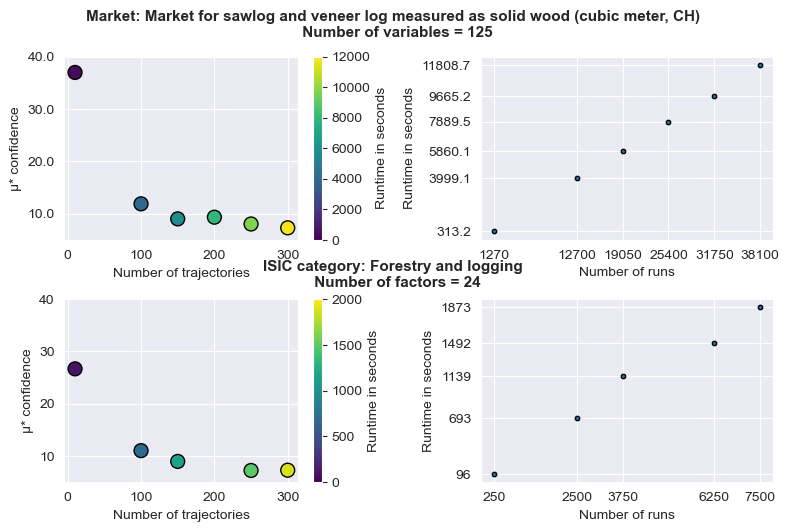

In [1850]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, axes = plt.subplots(2, 2, figsize=(8, 5))  # 2 rows, 2 columns
(ax1, ax2), (ax3, ax4) = axes  # Unpack axes

# --- First Scatter Plot ---
scatter_morris = ax1.scatter(data=joined_df, x="trajectories", y="mu_star_conf_relative", 
                             c="runtime", cmap='viridis', s=100, edgecolors='k')
ax1.set_xlabel('Number of trajectories')
ax1.set_ylabel('μ* confidence')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.1f}'))
ax1.set_ylim(5, 40)


cbar_morris = plt.colorbar(scatter_morris, ax=ax1)
cbar_morris.mappable.set_clim(0, 12000)
cbar_morris.set_label('Runtime in seconds')

# --- Second Scatter Plot ---
nb_runs = joined_df["number of runs"]
runtime = joined_df["runtime"]
scatter_morris = ax2.scatter(data=joined_df, x="number of runs", y="runtime", 
                             cmap='viridis', s=10, edgecolors='k')
ax2.set_xlabel('Number of runs')
ax2.set_ylabel('Runtime in seconds')
ax2.set_xticks(nb_runs)
ax2.set_yticks(runtime)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.1f}'))
ax2.set_ylabel('Runtime in seconds')


#ax2.set_title("Market for sawlog and veneer log\nMeasured as solid wood (cubic meter, CH)", fontsize=11)

# --- Third Scatter Plot ---
scatter_morris = ax3.scatter(data=joined_df2, x="trajectories", y="mu_star_conf_relative", 
                             c="runtime", cmap='viridis', s=100, edgecolors='k')
ax3.set_xlabel('Number of trajectories')
ax3.set_ylabel('μ* confidence')
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}'))
ax3.set_ylim(5, 40)
#ax3.set_title("ISIC category: Forestry and logging", fontsize=11)

cbar_morris = plt.colorbar(scatter_morris, ax=ax3)
cbar_morris.mappable.set_clim(0, 2000)
cbar_morris.set_label('Runtime in seconds')

# --- Fourth Subplot (Optional) ---
nb_runs = joined_df2["number of runs"]
runtime = joined_df2["runtime"]
scatter_morris = ax4.scatter(data=joined_df2, x="number of runs", y="runtime", 
                             cmap='viridis', s=10, edgecolors='k')
ax4.set_xlabel('Number of runs')
ax4.set_ylabel('Runtime')
ax4.set_xticks(nb_runs)
ax4.set_yticks(runtime)
ax4.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}'))
ax4.set_ylabel('Runtime in seconds')
#ax2.set_title("Market for sawlog and veneer log\nMeasured as solid wood (cubic meter, CH)", fontsize=11)



# Add Titles for Columns
#axes[0, 0].set_title("Market for sawlog and veneer log\nMeasured as solid wood (cubic meter, CH)", fontsize=12,  loc="center")
#axes[0, 1].set_title("Column 2: Analysis B", fontsize=12, fontweight="bold", loc="center")

# Add Titles for Rows
fig.text(0.5, 1, "Market: Market for sawlog and veneer log measured as solid wood (cubic meter, CH) \n Number of variables = 125", ha='center', fontsize=11 , fontweight='bold')
fig.text(0.5, 0.5, "ISIC category: Forestry and logging \n Number of factors = 24", ha='center', fontsize=11, fontweight='bold')
fig.tight_layout(pad=10) 

plt.tight_layout()
fig.savefig("figures/real_case_computational_efficiency.pdf", bbox_inches="tight")

plt.show()



In [2324]:
Global_category_10_cutoff5e_5 = pd.read_csv("Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_cutoff5e_5_market_scores_20.csv")
Global_category_10_cutoff5e_5['cutoff'] =  "0.005 %"

Global_category_10_cutoff5e_4 = pd.read_csv("Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__market_scores.csv")
Global_category_10_cutoff5e_4['cutoff'] =  "0.05 %"

df = pd.concat([Global_category_10_cutoff5e_5, 
                      Global_category_10_cutoff5e_4], axis=0)

filtered_df = df[df["mu_star_relative"] > 6]
heatmap_data = filtered_df.pivot(index="names", columns="cutoff", values="mu_star_relative")
heatmap_data 

cutoff                                                 0.005 %      0.05 %
names                                                                     
'market for electricity, high voltage' (kilowat...    9.848318    7.092063
'market for electricity, medium voltage' (kilow...    7.240722    9.428163
'market for petroleum' (kilogram, CH, None)                NaN    9.833704
'market for petroleum' (kilogram, Europe withou...   10.649958    8.053207
'market for sawlog and veneer log, softwood, me...  177.910414  163.751666
'market for transport, freight, lorry, unspecif...  109.825063  102.299190
'market group for diesel, low-sulfur' (kilogram...         NaN    6.799315
'transport, freight, lorry, all sizes, EURO3 to...   43.151054    7.019410
'transport, freight, lorry, all sizes, EURO4 to...   51.515194   68.831052
'transport, freight, lorry, all sizes, EURO5 to...   42.434186   79.508249
'transport, freight, lorry, all sizes, EURO6 to...   71.247301   24.619157
other                                                17.091512         NaN

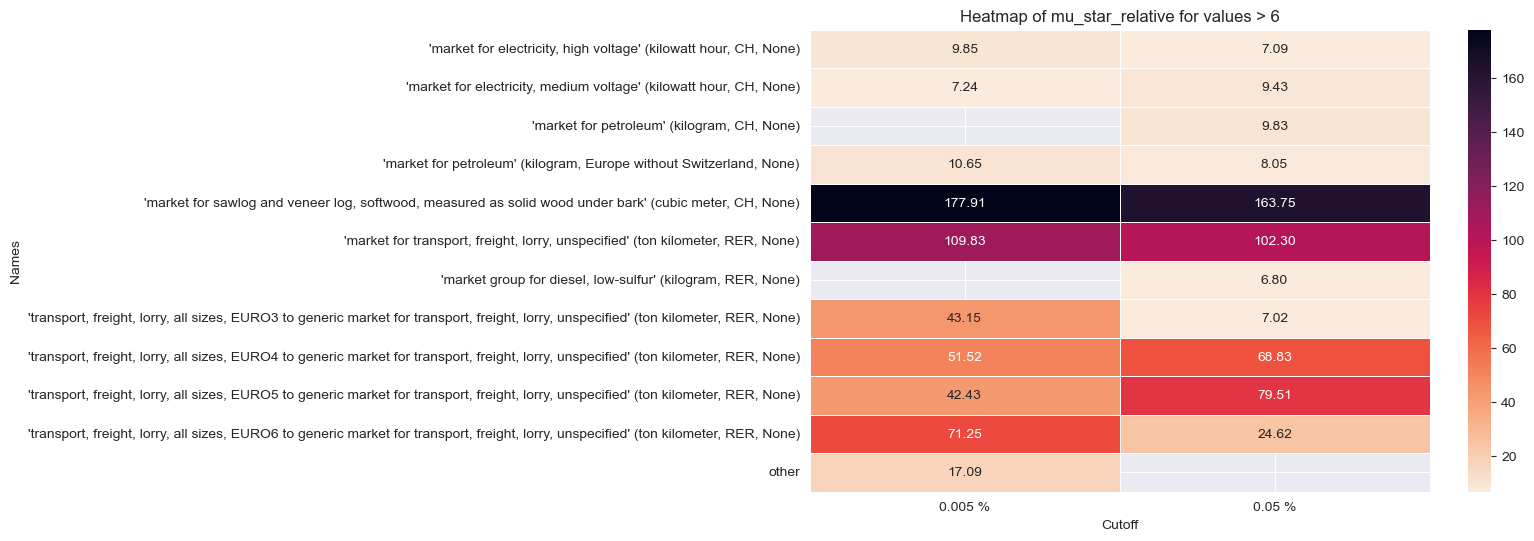

In [2325]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Sort columns for better readability
heatmap_data = heatmap_data.sort_index(axis=1)
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='rocket_r', annot=True, fmt=".2f", linewidths=0.5)

plt.title("Heatmap of mu_star_relative for values > 6")
plt.xlabel("Cutoff")
plt.ylabel("Names")

plt.show()


In [2254]:
Global_market= pd.read_csv("Global__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__market_scores_20.csv")
Local_market= pd.read_csv("Local__market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None__market_scores.csv")

# Local_market= pd.read_csv("Local__energy_saving__from_ventilation_system__1_x_720_m3_h__steel_ducts__with_earth_tube_heat_exchanger___megajoule__RoW__None__market_scores.csv")
# Global_market= pd.read_csv("Global__energy_saving__from_ventilation_system__1_x_720_m3_h__steel_ducts__with_earth_tube_heat_exchanger___megajoule__RoW__None__market_scores_20.csv")
products = pd.read_excel(r"../run.xlsx", sheet_name='to_plot')
# Local_market= pd.read_csv("Local__market_for_concrete__25_30MPa___cubic_meter__IN__None__market_scores.csv")
# Global_market= pd.read_csv("Global__market_for_concrete__25_30MPa___cubic_meter__IN__None__market_scores_20.csv")

In [2255]:
matched_df = Global_market.merge(Local_market, on='names', how='inner')

In [2257]:
product_list = products['names']

In [2258]:
product_list[0]

'_market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_'

In [2259]:
Local_scores = []
for product in product_list:
    Local_market = pd.read_csv(f"Local_{product}_market_scores.csv")
    Local_scores.append(Local_market)
    
Global_scores = []
for product in product_list:
    Global_market = pd.read_csv(f"Global_{product}_market_scores_20.csv")
    Global_scores.append(Global_market)
    

In [2260]:
Global_df = pd.concat(Global_scores, ignore_index=True)
Local_df = pd.concat(Local_scores, ignore_index=True)

matched_df = Global_df.merge(Local_df, on=['names', 'reference_product'], how='inner')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


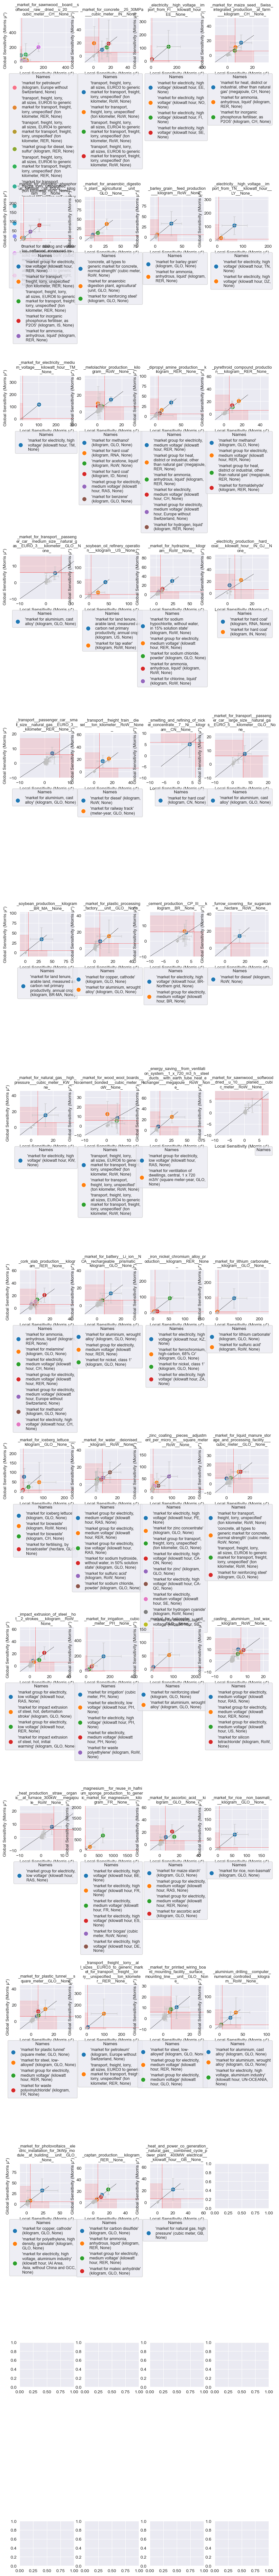

In [2261]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import textwrap
import warnings

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

# Filter dataset and extract unique reference products
filtered_df = matched_df
reference_products = filtered_df['reference_product'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=15, ncols=4, figsize=(10, 90))
axes = axes.flatten()  # Flatten axes array for easy iteration

def add_newlines(text, n=3):
    """Wrap text to insert newlines every n words."""
    return '\n'.join(textwrap.wrap(text, width=n * 10))

# Iterate through each reference product
for ax, product in zip(axes, reference_products):
    product_df = filtered_df[filtered_df['reference_product'] == product]

    # Split into high and low global sensitivity groups
    high_global_df = product_df[product_df['mu_star_relative'] > 5]
    low_global_df = product_df[product_df['mu_star_relative'] <= 6]

    # Apply text wrapping
    high_global_df['names_with_newlines'] = high_global_df['names'].apply(add_newlines)
    product_with_newlines = add_newlines(product)

    # Dynamically set axis limits
    x_min, x_max = product_df['mu_star_local_relative'].min(), product_df['mu_star_local_relative'].max()
    y_min, y_max = product_df['mu_star_relative'].min(), product_df['mu_star_relative'].max()

    x_padding= (x_max - x_min) * 2 if x_max > x_min else 5
    y_padding = (y_max - y_min) * 2 if y_max > y_min else 5

    ax.set_xlim(-10 , x_max + x_padding)
    ax.set_ylim(-10, y_max + y_padding)

    # Plot high-sensitivity points with legend
    scatter_high = sns.scatterplot(
        x=high_global_df['mu_star_local_relative'], 
        y=high_global_df['mu_star_relative'], 
        hue=high_global_df['names_with_newlines'], 
        ax=ax, s=100, legend='brief'
    )
    scatter_high.legend(loc='upper right', bbox_to_anchor=(1.1, -0.2), title="Names", fontsize=9)

    # Plot low-sensitivity points in grey without legend
    ax.scatter(
        low_global_df['mu_star_local_relative'], 
        low_global_df['mu_star_relative'], 
        color='#D3D3D3', alpha=0.6, s=10, label='_nolegend_'
    )

    # Plot diagonal reference line
    ax.plot([x_min - 10, x_max + 10], [y_min - 10, y_max + 10], linestyle="--", color="black", linewidth=0.6)

    # Set labels and title
    ax.set_xlabel("Local Sensitivity (Morris μ*)")
    ax.set_ylabel("Global Sensitivity (Morris μ*)")
    ax.set_title(f"{product_with_newlines}", fontsize=9)

    # Add error bars
    ax.errorbar(
        product_df['mu_star_local_relative'], 
        product_df['mu_star_relative'], 
        xerr=product_df['mu_star_local_relative_conf'] * 1.96, 
        yerr=product_df['mu_star_conf_relative'] * 1.96, 
        fmt='_', color='silver', alpha=0.6, capsize=3, capthick=1
    )

    # Add red threshold lines and shaded areas
    ax.axvline(x=6, color='red', linestyle='--', linewidth=0.5)
    ax.axhline(y=6, color='red', linestyle='--', linewidth=0.5)
    ax.fill_betweenx(y=[6, y_max + 10], x1=x_min - 10, x2=6, color='red', alpha=0.1)
    ax.fill_betweenx(y=[y_min - 10, 6], x1=6, x2=x_max + 10, color='red', alpha=0.1)

# Adjust layout
fig.subplots_adjust(hspace=3, bottom=0)
plt.tight_layout(pad=1.0)

# Show and save the figure
plt.show()
fig.savefig("figures/local_vs_global_sensitivity_comparison_multiple_rows_3x2_with_legend.pdf", bbox_inches="tight")


In [2163]:
reference_products = ['_market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_',
                       '_market_for_wood_wool_boards__cement_bonded___cubic_meter__RoW__None_',
                      '_market_for_inorganic_phosphorus_fertiliser__as_P2O5___kilogram__IS__None_',
                        '_market_for_concrete__25_30MPa___cubic_meter__IN__None_'
                     
                     
                     
                      ]

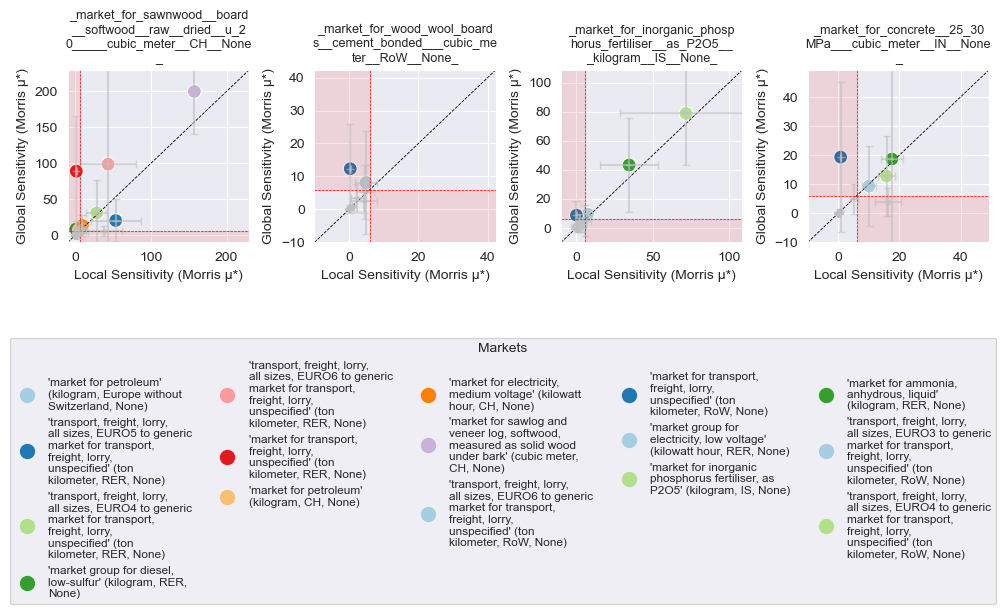

In [2169]:
import matplotlib.lines as mlines

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

# Filter dataset and extract unique reference products
filtered_df = matched_df

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
axes = axes.flatten()  # Flatten axes array for easy iteration

def add_newlines(text, n=3):
    """Wrap text to insert newlines every n words."""
    return '\n'.join(textwrap.wrap(text, width=n * 9))

# Initialize storage for combined legend handles and labels
combined_legend_handles = []
combined_legend_labels = []
seen_labels = set()  # To track unique labels across all subplots

# Create a color palette for the legend manually
palette = sns.color_palette("Paired", len(filtered_df['names'].unique()))

# Track unique color for each product
color_map = {product: palette[i] for i, product in enumerate(filtered_df['reference_product'].unique())}

for i, (ax, product) in enumerate(zip(axes, reference_products)):
    product_df = filtered_df[filtered_df['reference_product'] == product]

    # Split into high and low global sensitivity groups
    high_global_df = product_df[product_df['mu_star_relative'] > 6]
    low_global_df = product_df[product_df['mu_star_relative'] <= 6]

    # Apply text wrapping
    high_global_df['names_with_newlines'] = high_global_df['names'].apply(add_newlines)
    product_with_newlines = add_newlines(product)

    # Set axis limits dynamically
    x_min, x_max = product_df['mu_star_local_relative'].min(), product_df['mu_star_local_relative'].max()
    y_min, y_max = product_df['mu_star_relative'].min(), product_df['mu_star_relative'].max()

    ax.set_xlim(-10, y_max + 30)
    ax.set_ylim(-10, y_max + 30)

    # Plot high-sensitivity points
    scatter = sns.scatterplot(
        x=high_global_df['mu_star_local_relative'], 
        y=high_global_df['mu_star_relative'], 
        hue=high_global_df['names_with_newlines'], 
        ax=ax, s=100, palette=palette, legend=False  # Turn off individual legends
    )

    # Add legend entries for unique hue values, avoiding duplicates across subplots
    for name, color in zip(high_global_df['names_with_newlines'].unique(), palette):
        if name not in seen_labels:  # Only add label if it hasn't been seen
            legend_handle = mlines.Line2D([], [], marker='o', color=color, linestyle='', markersize=10, label=name)
            combined_legend_handles.append(legend_handle)
            combined_legend_labels.append(name)
            seen_labels.add(name)  # Mark this label as seen

    # Plot low-sensitivity points in grey
    ax.scatter(
        low_global_df['mu_star_local_relative'], 
        low_global_df['mu_star_relative'], 
        color='#D3D3D3', alpha=0.6, s=10, label='_nolegend_'
    )

    # Plot diagonal reference line
    ax.plot([-10, 300], [-10, 300], linestyle="--", color="black", linewidth=0.6)

    # Set labels and title
    ax.set_xlabel("Local Sensitivity (Morris μ*)")
    ax.set_ylabel("Global Sensitivity (Morris μ*)")
    ax.set_title(f"{product_with_newlines}", fontsize=9)

    # Add error bars
    ax.errorbar(
        product_df['mu_star_local_relative'], 
        product_df['mu_star_relative'], 
        xerr=product_df['mu_star_local_relative_conf'] * 1.96, 
        yerr=product_df['mu_star_conf_relative'] * 1.96, 
        fmt='_', color='silver', alpha=0.6, capsize=3, capthick=1
    )

    # Add red threshold lines and shaded areas
    ax.axvline(x=6, color='red', linestyle='--', linewidth=0.5)
    ax.axhline(y=6, color='red', linestyle='--', linewidth=0.5)
    ax.fill_betweenx(y=[6, 300], x1=x_min - 10, x2=6, color='red', alpha=0.1)
    ax.fill_betweenx(y=[-10, 6], x1=6, x2=x_max + 300, color='red', alpha=0.1)

# Now create a **single combined legend** at the figure level, positioned below the plots
fig.legend(
    handles=combined_legend_handles, 
    labels=combined_legend_labels, 
    loc='upper center', bbox_to_anchor=(0.5, -0.12), 
    ncol=5,  # Make the legend span multiple columns
    title="Markets", fontsize=8.5
)

# Adjust layout to prevent overlap and ensure the legend is displayed clearly
plt.tight_layout(pad=1)

# Show and save the figure
plt.show()
fig.savefig("figures/local_vs_global_sensitivity_comparison_combined_legend_below_full_width_v2.pdf", bbox_inches="tight")


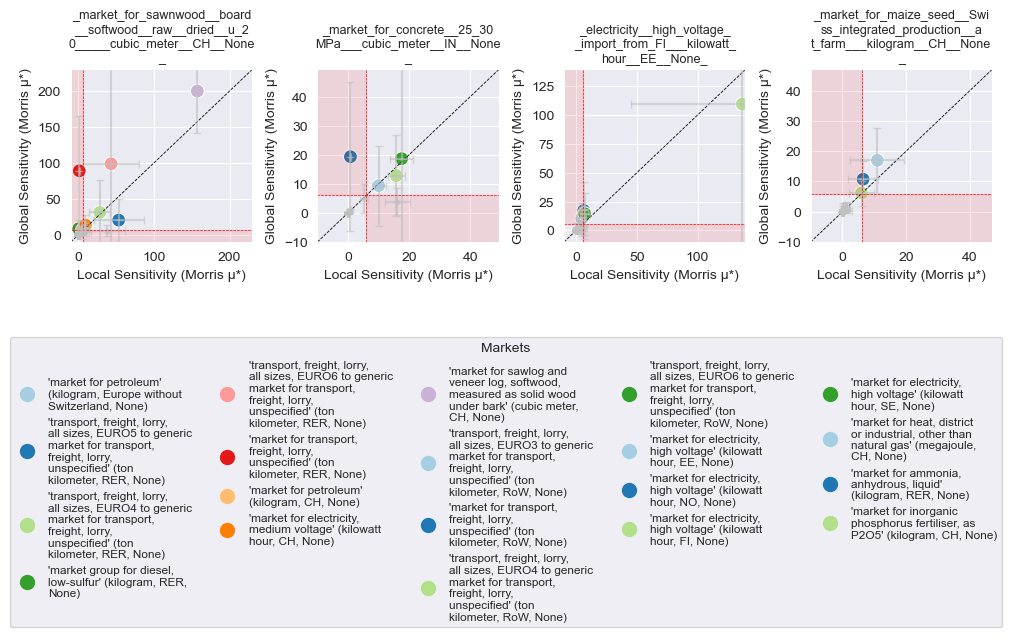

In [2165]:
import matplotlib.lines as mlines
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import textwrap

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

# Filter dataset and extract unique reference products
filtered_df = matched_df

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
axes = axes.flatten()  # Flatten axes array for easy iteration

def add_newlines(text, n=3):
    """Wrap text to insert newlines every n words."""
    return '\n'.join(textwrap.wrap(text, width=n * 9))

# Initialize storage for combined legend handles and labels
combined_legend_handles = []
combined_legend_labels = []
seen_labels = set()  # To track unique labels across all subplots

# Create a color palette for the legend manually
palette = sns.color_palette("Paired", len(filtered_df['names'].unique()))

# Create a fixed color map for each product to ensure unique color assignment
color_map = {product: palette[i] for i, product in enumerate(filtered_df['reference_product'].unique())}

for i, (ax, product) in enumerate(zip(axes, filtered_df['reference_product'].unique())):
    product_df = filtered_df[filtered_df['reference_product'] == product]

    # Split into high and low global sensitivity groups
    high_global_df = product_df[product_df['mu_star_relative'] > 6]
    low_global_df = product_df[product_df['mu_star_relative'] <= 6]

    # Apply text wrapping
    high_global_df['names_with_newlines'] = high_global_df['names'].apply(add_newlines)
    product_with_newlines = add_newlines(product)

    # Set axis limits dynamically
    x_min, x_max = product_df['mu_star_local_relative'].min(), product_df['mu_star_local_relative'].max()
    y_min, y_max = product_df['mu_star_relative'].min(), product_df['mu_star_relative'].max()

    ax.set_xlim(-10, y_max + 30)
    ax.set_ylim(-10, y_max + 30)

    # Plot high-sensitivity points
    scatter = sns.scatterplot(
        x=high_global_df['mu_star_local_relative'], 
        y=high_global_df['mu_star_relative'], 
        hue=high_global_df['names_with_newlines'], 
        ax=ax, s=100, palette=palette, legend=False  # Turn off individual legends
    )

    # Add legend entries for unique hue values, avoiding duplicates across subplots
    for name, color in zip(high_global_df['names_with_newlines'].unique(), palette):
        if name not in seen_labels:  # Only add label if it hasn't been seen
            legend_handle = mlines.Line2D([], [], marker='o', color=color, linestyle='', markersize=10, label=name)
            combined_legend_handles.append(legend_handle)
            combined_legend_labels.append(name)
            seen_labels.add(name)  # Mark this label as seen

    # Plot low-sensitivity points in grey
    ax.scatter(
        low_global_df['mu_star_local_relative'], 
        low_global_df['mu_star_relative'], 
        color='#D3D3D3', alpha=0.6, s=10, label='_nolegend_'
    )

    # Plot diagonal reference line
    ax.plot([-10, 300], [-10, 300], linestyle="--", color="black", linewidth=0.6)

    # Set labels and title
    ax.set_xlabel("Local Sensitivity (Morris μ*)")
    ax.set_ylabel("Global Sensitivity (Morris μ*)")
    ax.set_title(f"{product_with_newlines}", fontsize=9)

    # Add error bars
    ax.errorbar(
        product_df['mu_star_local_relative'], 
        product_df['mu_star_relative'], 
        xerr=product_df['mu_star_local_relative_conf'] * 1.96, 
        yerr=product_df['mu_star_conf_relative'] * 1.96, 
        fmt='_', color='silver', alpha=0.6, capsize=3, capthick=1
    )

    # Add red threshold lines and shaded areas
    ax.axvline(x=6, color='red', linestyle='--', linewidth=0.5)
    ax.axhline(y=6, color='red', linestyle='--', linewidth=0.5)
    ax.fill_betweenx(y=[6, 300], x1=x_min - 10, x2=6, color='red', alpha=0.1)
    ax.fill_betweenx(y=[-10, 6], x1=6, x2=x_max + 300, color='red', alpha=0.1)

# Now create a **single combined legend** at the figure level, positioned below the plots
fig.legend(
    handles=combined_legend_handles, 
    labels=combined_legend_labels, 
    loc='upper center', bbox_to_anchor=(0.5, -0.12), 
    ncol=5,  # Make the legend span multiple columns
    title="Markets", fontsize=8.5
)

# Adjust layout to prevent overlap and ensure the legend is displayed clearly
plt.tight_layout(pad=1)

# Show and save the figure
plt.show()
fig.savefig("figures/local_vs_global_sensitivity_comparison_combined_legend_below_full_width_v2.pdf", bbox_inches="tight")


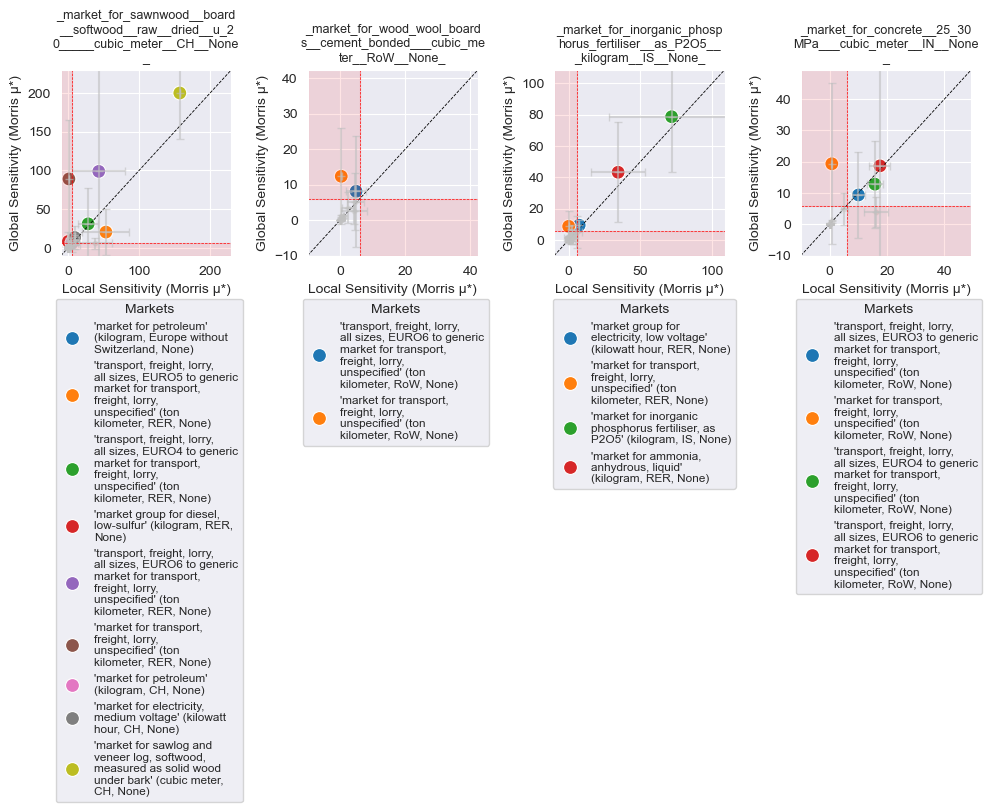

In [2108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import textwrap
import warnings

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

# Filter dataset and extract unique reference products
filtered_df = matched_df
#reference_products = filtered_df['reference_product'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 9.5))
axes = axes.flatten()  # Flatten axes array for easy iteration

def add_newlines(text, n=3):
    """Wrap text to insert newlines every n words."""
    return '\n'.join(textwrap.wrap(text, width=n * 9))

# Iterate through each reference product
for ax, product in zip(axes, reference_products):
    product_df = filtered_df[filtered_df['reference_product'] == product]

    # Split into high and low global sensitivity groups
    high_global_df = product_df[product_df['mu_star_relative'] > 6]
    low_global_df = product_df[product_df['mu_star_relative'] <= 6]

    # Apply text wrapping
    high_global_df['names_with_newlines'] = high_global_df['names'].apply(add_newlines)
    product_with_newlines = add_newlines(product)

#     # Dynamically set axis limits
    x_min, x_max = product_df['mu_star_local_relative'].min(), product_df['mu_star_local_relative'].max()
    y_min, y_max = product_df['mu_star_relative'].min(), product_df['mu_star_relative'].max()

    x_padding= (x_max - x_min) * 0.1 if x_max > x_min else 5
    y_padding = (y_max - y_min) * 0.1 if y_max > y_min else 5

    ax.set_xlim(-10 , y_max+30)
    ax.set_ylim(-10, y_max+30)

    # Plot high-sensitivity points with legend
    scatter_high = sns.scatterplot(
        x=high_global_df['mu_star_local_relative'], 
        y=high_global_df['mu_star_relative'], 
        hue=high_global_df['names_with_newlines'], 
        ax=ax, s=100, legend='brief'
    )
    scatter_high.legend(loc='upper right', bbox_to_anchor=(1.1, -0.2), title="Markets", fontsize=8.5)

    # Plot low-sensitivity points in grey without legend
    ax.scatter(
        low_global_df['mu_star_local_relative'], 
        low_global_df['mu_star_relative'], 
        color='#D3D3D3', alpha=0.6, s=10, label='_nolegend_'
    )

    # Plot diagonal reference line
    ax.plot([- 10, 300], [- 10, 300], linestyle="--", color="black", linewidth=0.6)

    # Set labels and title
    ax.set_xlabel("Local Sensitivity (Morris μ*)")
    ax.set_ylabel("Global Sensitivity (Morris μ*)")
    ax.set_title(f"{product_with_newlines}", fontsize=9)

    # Add error bars
    ax.errorbar(
        product_df['mu_star_local_relative'], 
        product_df['mu_star_relative'], 
        xerr=product_df['mu_star_local_relative_conf'] * 1.96, 
        yerr=product_df['mu_star_conf_relative'] * 1.96, 
        fmt='_', color='silver', alpha=0.6, capsize=3, capthick=1
    )

    # Add red threshold lines and shaded areas
    ax.axvline(x=6, color='red', linestyle='--', linewidth=0.5)
    ax.axhline(y=6, color='red', linestyle='--', linewidth=0.5)
    ax.fill_betweenx(y=[6, 300], x1=x_min - 10, x2=6, color='red', alpha=0.1)
    ax.fill_betweenx(y=[- 10, 6], x1=6, x2=x_max + 300, color='red', alpha=0.1)

# Adjust layout
fig.subplots_adjust(hspace=0, bottom=0)
plt.tight_layout(pad=1)

# Show and save the figure
plt.show()
fig.savefig("figures/local_vs_global_sensitivity_comparison_multiple_rows_3x2_with_legend.pdf", bbox_inches="tight")


In [2267]:
# 	from activity name	from reference product	from location	from categories	from database	from key	to activity name	to reference product	to location	to categories	to database	to key	flow type	amount
# 0	market group for electricity, medium voltage	electricity, medium voltage	RME		cutoff-3.9.1	('cutoff-3.9.1', '9eb8df36e2889e9eb6e28f63117bdcbc')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.06181351269218415
# 1	market for electricity, medium voltage	electricity, medium voltage	IL		cutoff-3.9.1	('cutoff-3.9.1', '322d6a42eb374023b4eda4b77ba9aa2e')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.00442915748555263
# 2	market for electricity, medium voltage	electricity, medium voltage	ID		cutoff-3.9.1	('cutoff-3.9.1', '4ac16ec591f3e163f6a4c5c3de3c15bc')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.01356400844512302
# 3	market for electricity, medium voltage	electricity, medium voltage	KP		cutoff-3.9.1	('cutoff-3.9.1', 'c279dfe051978e642ae5ddf63603638f')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.0009823429270647357
# 4	market for electricity, medium voltage	electricity, medium voltage	LB		cutoff-3.9.1	('cutoff-3.9.1', '1bc65cd92c82c249f759c6fedc8857e6')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.001053798945655425
# 5	market group for electricity, medium voltage	electricity, medium voltage	CN		cutoff-3.9.1	('cutoff-3.9.1', 'd2cf377db3ed6bbbe4ea357e2d2def51')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.5781144171019293
# 6	market for electricity, medium voltage	electricity, medium voltage	NP		cutoff-3.9.1	('cutoff-3.9.1', 'e0fce0c3aa69780db4c9497f15289d31')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.0005634019018021555
# 7	market for electricity, medium voltage	electricity, medium voltage	QA		cutoff-3.9.1	('cutoff-3.9.1', '6a3ffbd93d1633591d8ae12995243b03')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.00014025740498251817
# 8	market for electricity, medium voltage	electricity, medium voltage	TM		cutoff-3.9.1	('cutoff-3.9.1', 'aa76fa2c276f7341525fa2ba4e34bd0f')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.001318920291781481
# 9	market for electricity, medium voltage	electricity, medium voltage	OM		cutoff-3.9.1	('cutoff-3.9.1', '6837a0e11357c94c5b5e92fa95f9e7e7')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.002726174072705906
# 10	market for electricity, medium voltage	electricity, medium voltage	KR		cutoff-3.9.1	('cutoff-3.9.1', 'f34aade82e85a43f391148a6e91c62fe')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.04043605266364149
# 11	market for electricity, medium voltage	electricity, medium voltage	LK		cutoff-3.9.1	('cutoff-3.9.1', '6c52fcafcd8f30f5288d933e9a5c7692')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.0011050863856191394
# 12	market for electricity, medium voltage	electricity, medium voltage	JO		cutoff-3.9.1	('cutoff-3.9.1', '907606eceaf46abf699d524464d0b76e')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.0012413451235605813
# 13	market for electricity, medium voltage	electricity, medium voltage	AM		cutoff-3.9.1	('cutoff-3.9.1', 'd949b8732140a0aff20fe20934aca781')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.00048449131730126706
# 14	market for electricity, medium voltage	electricity, medium voltage	YE		cutoff-3.9.1	('cutoff-3.9.1', '0abcc8acabfa44ffe012e0e41860d45b')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.00018453641479874693
# 15	market for electricity, medium voltage	electricity, medium voltage	PH		cutoff-3.9.1	('cutoff-3.9.1', '9944c6a75c100d4cc34532a9a1c3e888')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.007480371444779368
# 16	market for electricity, medium voltage	electricity, medium voltage	JP		cutoff-3.9.1	('cutoff-3.9.1', 'f78c2a78db02b8723f34138e384ff1c7')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.06472847581500331
# 17	market for electricity, medium voltage	electricity, medium voltage	CY		cutoff-3.9.1	('cutoff-3.9.1', '8513f23a14984751377b1cf0505e1ee8')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.000365550888034046
# 18	market for electricity, medium voltage	electricity, medium voltage	KG		cutoff-3.9.1	('cutoff-3.9.1', 'fd673cf6023b47ded3fe1942af912502')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.001094712626532761
# 19	market for electricity, medium voltage	electricity, medium voltage	MY		cutoff-3.9.1	('cutoff-3.9.1', '3db7ffce2c0c6db55e382d6c5cd55dd2')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.012142289717197607
# 20	market for electricity, medium voltage	electricity, medium voltage	BN		cutoff-3.9.1	('cutoff-3.9.1', '518b0130d83f3f809e6a0b6e8b67f066')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.00028527286037531677
# 21	market for electricity, medium voltage	electricity, medium voltage	BD		cutoff-3.9.1	('cutoff-3.9.1', 'f2eb22ba9826aef0fd491d2d1ab13cc5')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.005294013489143995
# 22	market for electricity, medium voltage	electricity, medium voltage	AZ		cutoff-3.9.1	('cutoff-3.9.1', '0bd9f98b6685fdb4037d0638393e8e49')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.0016129907751635429
# 23	market for electricity, medium voltage	electricity, medium voltage	UZ		cutoff-3.9.1	('cutoff-3.9.1', '4c1696be0f1e44618e85e1dcbffcf6a4')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.0046891691315493955
# 24	market for electricity, medium voltage	electricity, medium voltage	VN		cutoff-3.9.1	('cutoff-3.9.1', 'd21f64083a414fa418b695de86044090')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.016519571036977675
# 25	market for electricity, medium voltage	electricity, medium voltage	KZ		cutoff-3.9.1	('cutoff-3.9.1', '35e9cb4f110b79314205e792b1625f01')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.007521293650168346
# 26	market for electricity, medium voltage	electricity, medium voltage	TJ		cutoff-3.9.1	('cutoff-3.9.1', '411794cfb4c92fe3d7cb13f6999ab628')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.0013090871974594425
# 27	market for electricity, medium voltage	electricity, medium voltage	MN		cutoff-3.9.1	('cutoff-3.9.1', '912e905c03ff1d3bd655699baf081bdd')	market group for electricity, medium voltage	electricity, medium voltage	RAS		cutoff-3.9.1	('cutoff-3.9.1', '5cb69853f15e2cf372fcf87080a69dac')	technosphere	0.000615168488485759
# 'c4fe63b2bf588dd6cd7510c09a049eba'
# 'c0671a0ae18512b9d18a17972de79857'
# '39d2e947b518f05a9ad0bff688676da6'
# 'c8e94b81820ce5ab23efdf205e15cc04'
# '07d56bfcebb24751d02af52793eb8a3c'
# 'a089770f4fd156e4a167be4625b75437'
# 'fcfbc7a1053e57faab0e6515c9b9740d'
# 'aaeefb356c7d37e2e0eb90e5793f7811'
# 'fb7307ef743ddfc993b19f78ce16a0f2'
# 'ea3bc735a7109dd0864a476c7ad2d890'
# 'c160b5b22f6d3fcbbe2976eb06cf6b15'

bw.projects.set_current("UK-wood-clca")
cutoff391 = bw.Database('cutoff-3.9.1')
methods = [

     ('ReCiPe 2016 v1.03, midpoint (H)', 'climate change', 'global warming potential (GWP1000)'), 

]

fu = cutoff391.get('c4fe63b2bf588dd6cd7510c09a049eba')
lca = bw.LCA({fu:1}, method=methods[0])
lca.lci()
lca.lcia()
lca.score

0.891791352708705

In [2280]:
df =  pd.concat([Global_market, Local_market], ignore_index=True)

In [2281]:
df['fu'] =  '_market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_'

In [2282]:
df['names'][1]

"'market group for electricity, medium voltage' (kilowatt hour, RER, None)"

In [2283]:
df['names'] = df['names'] + '_' + df.groupby('names').cumcount().astype(str)

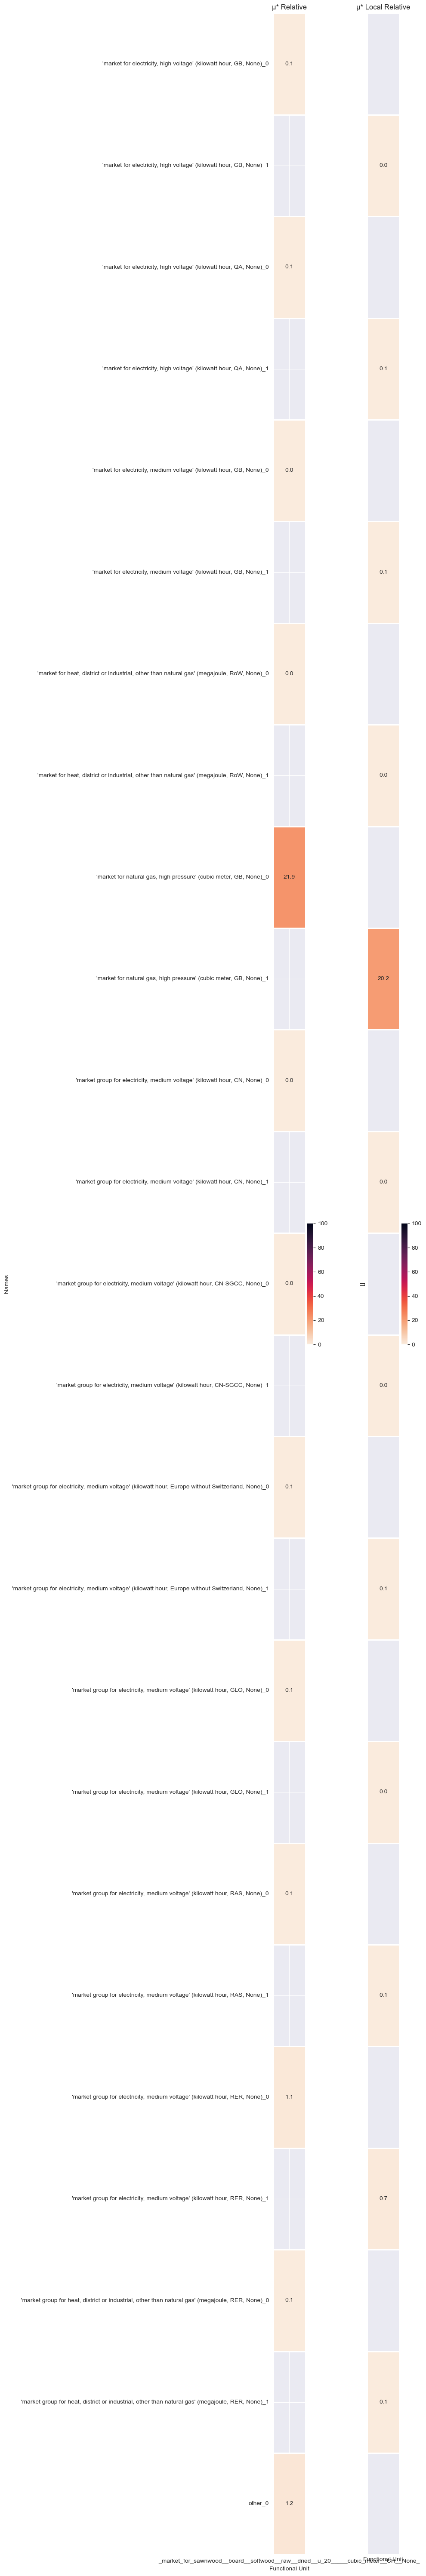

In [2284]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the heatmap data
heatmap_data = {"μ* Relative": "mu_star_relative", "μ* Local Relative": "mu_star_local_relative"}



# Create a subplot grid (1 row for the functional unit, 2 columns for local and global scores)
fig, axes = plt.subplots(1, 2, figsize=(10, 60))  # Adjust the size accordingly


# Plot the global score (μ* Relative) in the first column
ax_global = axes[0]  # First column for global scores
df_pivot_global = df.pivot(index="names", columns="fu", values="mu_star_relative")
sns.heatmap(df_pivot_global, cmap="rocket_r", annot=True, fmt=".1f",
            vmin=0, vmax=100, linewidth=1, linecolor="white", ax=ax_global, cbar=True)
ax_global.set_title(f"μ* Relative")
ax_global.set_ylabel("Names")
ax_global.set_xlabel("Functional Unit")

# Plot the local score (μ* Local Relative) in the second column
ax_local = axes[1]  # Second column for local scores
df_pivot_local = df.pivot(index="names", columns="fu", values="mu_star_local_relative")
sns.heatmap(df_pivot_local, cmap="rocket_r", annot=True, fmt=".1f",
            vmin=0, vmax=100, linewidth=1, linecolor="white", ax=ax_local, cbar=True)
ax_local.set_title(f"μ* Local Relative")
ax_local.set_ylabel([])  # Remove y-label for local plot
ax_local.set_yticks([])  # Remove y-ticks for local plot
ax_local.set_xticks([])  # Remove x-ticks for local plot
ax_local.set_xlabel("Functional Unit")

# Adjust layout and show plot
plt.tight_layout()
plt.show()
#df_pivot_global.max().max()

# Ecoinvent: local versus global

In [631]:
All_scores = pd.read_csv("All_test_1_scores.csv")

In [632]:
All_scores["mu_star_local"] = All_scores["mu_star_local"]
All_scores["mu_star"] = All_scores["mu_star"]

In [633]:
#All_scores =  All_scores.iloc[1130:1509, :]
All_scores = All_scores[All_scores['fu'] == '_aluminium_production__primary__liquid__prebake___kilogram__UN_OCEANIA__None_']



In [634]:
df = All_scores.drop(columns=['sigma', 'mu', 'count', 'score_x', 'mu_star_relative', 'score_y', 'mu_star_conf', 'mu_star_local_relative'])

In [635]:
set(df["fu"])

{'_aluminium_production__primary__liquid__prebake___kilogram__UN_OCEANIA__None_'}

In [636]:
# Define the threshold
threshold = 0

# Get all unique functional units
unique_fus = df["fu"].unique()

# Initialize a list to store valid functional units
valid_fus = []

# Check each functional unit
for fu in unique_fus:
    # Subset the dataframe for the current fu
    df_fu = df[df["fu"] == fu]
    
    # Check if there is at least one category where one score is <6% and the other is >6%
    tolerance_lower = threshold * 0  # 1% below the threshold
    tolerance_upper = threshold * 0  # 2% above the threshold

    different = ((df_fu["mu_star"] < tolerance_lower) & (df_fu["mu_star_local"] > tolerance_upper)) | \
                    ((df_fu["mu_star"] > tolerance_upper) & (df_fu["mu_star_local"] < tolerance_lower))
    # If the condition is met for at least one category, keep this fu
    if different.any():
        valid_fus.append(fu)

# Print the results
different = []
if valid_fus:
    print("Functional Units where global and local scores differ significantly in at least one category:")
    for fu in valid_fus:
        different.append(fu)

different


[]

In [637]:
look_up = df[df['fu'] == '_market_for_sawnwood__board__softwood__raw__dried__u_20_____cubic_meter__CH__None_']

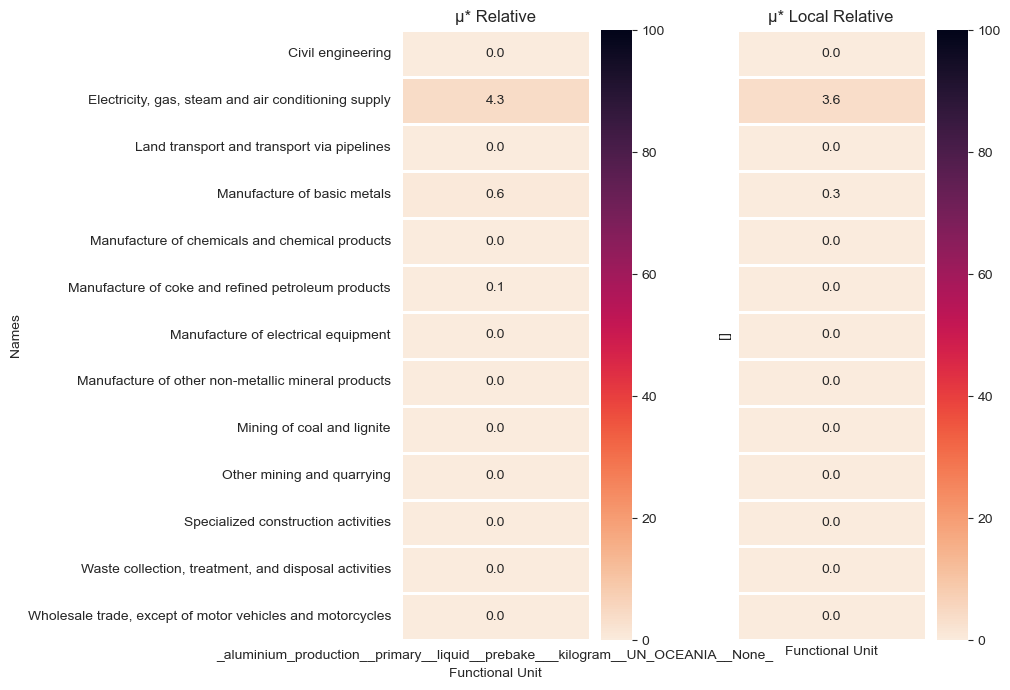

In [638]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the heatmap data
heatmap_data = {"μ* Relative": "mu_star", "μ* Local Relative": "mu_star_local"}

# Select the first unique functional unit (or the only one)
unique_fus = df["fu"] #.unique()#[:1]  # Only the first one since you have only one FU

# Create a subplot grid (1 row for the functional unit, 2 columns for local and global scores)
fig, axes = plt.subplots(1, 2, figsize=(10, 7))  # Adjust the size accordingly

# Plot for the selected functional unit
fu = unique_fus
#df_fu = look_up[look_up["fu"] == fu]

# Plot the global score (μ* Relative) in the first column
ax_global = axes[0]  # First column for global scores
df_pivot_global = df.pivot(index="names", columns="fu", values="mu_star")
sns.heatmap(df_pivot_global, cmap="rocket_r", annot=True, fmt=".1f",
            vmin=0, vmax=100, linewidth=1, linecolor="white", ax=ax_global, cbar=True)
ax_global.set_title(f"μ* Relative")
ax_global.set_ylabel("Names")
ax_global.set_xlabel("Functional Unit")

# Plot the local score (μ* Local Relative) in the second column
ax_local = axes[1]  # Second column for local scores
df_pivot_local = df.pivot(index="names", columns="fu", values="mu_star_local")
sns.heatmap(df_pivot_local, cmap="rocket_r", annot=True, fmt=".1f",
            vmin=0, vmax=100, linewidth=1, linecolor="white", ax=ax_local, cbar=True)
ax_local.set_title(f"μ* Local Relative")
ax_local.set_ylabel([])  # Remove y-label for local plot
ax_local.set_yticks([])  # Remove y-ticks for local plot
ax_local.set_xticks([])  # Remove x-ticks for local plot
ax_local.set_xlabel("Functional Unit")

# Adjust layout and show plot
plt.tight_layout()
plt.show()
#df_pivot_global.max().max()
